# Linear Regression for Perth House Prices
_________________

## Import libraries
_____________________________

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
#from scipy import stas
#import math 
#import random
#import sys
import pickle
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## Load Data
____________

In [2]:
df = pd.read_csv('all_perth_310121.csv') #read the data 

df.head()

ADDRESS      SUBURB   PRICE  BEDROOMS  BATHROOMS  GARAGE  \
0    1 Acorn Place  South Lake  565000         4          2     2.0   
1      1 Addis Way       Wandi  365000         3          2     2.0   
2  1 Ainsley Court     Camillo  287000         3          1     1.0   
3  1 Albert Street    Bellevue  255000         2          1     2.0   
4     1 Aman Place   Lockridge  325000         4          1     2.0   

   LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST               NEAREST_STN  \
0        600         160      2003.0     18300  Cockburn Central Station   
1        351         139      2013.0     26900           Kwinana Station   
2        719          86      1979.0     22600           Challis Station   
3        651          59      1953.0     17900           Midland Station   
4        466         131      1998.0     11200        Bassendean Station   

   NEAREST_STN_DIST  DATE_SOLD  POSTCODE   LATITUDE   LONGITUDE  \
0              1800  09-2018\r      6164 -32.115900  115.842450   
1              4900  02-2019\r      6167 -32.193470  115.859554   
2              1900  06-2015\r      6111 -32.120578  115.993579   
3              3600  07-2018\r      6056 -31.900547  116.038009   
4              2000  11-2016\r      6054 -31.885790  115.947780   

                    NEAREST_SCH  NEAREST_SCH_DIST  NEAREST_SCH_RANK  
0   LAKELAND SENIOR HIGH SCHOOL          0.828339               NaN  
1                ATWELL COLLEGE          5.524324             129.0  
2  KELMSCOTT SENIOR HIGH SCHOOL          1.649178             113.0  
3  SWAN VIEW SENIOR HIGH SCHOOL          1.571401               NaN  
4                 KIARA COLLEGE          1.514922               NaN

In [3]:
df.tail()

ADDRESS           SUBURB    PRICE  BEDROOMS  BATHROOMS  \
33651      9C Gold Street  South Fremantle  1040000         4          3   
33652      9C Pycombe Way      Westminster   410000         3          2   
33653      9D Pycombe Way      Westminster   427000         3          2   
33654     9D Shalford Way       Girrawheen   295000         3          1   
33655  9E Margaret Street          Midland   295000         3          1   

       GARAGE  LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST        NEAREST_STN  \
33651     2.0        292         245      2013.0     16100  Fremantle Station   
33652     2.0        228         114         NaN      9600   Stirling Station   
33653     2.0        261         112         NaN      9600   Stirling Station   
33654     2.0        457          85      1974.0     12600    Warwick Station   
33655     2.0        296          95         NaN     16700    Midland Station   

       NEAREST_STN_DIST  DATE_SOLD  POSTCODE   LATITUDE   LONGITUDE  \
33651              1500  03-2016\r      6162 -32.064580  115.751820   
33652              4600  02-2017\r      6061 -31.867055  115.841403   
33653              4600  02-2017\r      6061 -31.866890  115.841418   
33654              4400  10-2016\r      6064 -31.839680  115.842410   
33655              1700  05-2016\r      6056 -31.882163  116.014755   

                                       NEAREST_SCH  NEAREST_SCH_DIST  \
33651                  CHRISTIAN BROTHERS' COLLEGE          1.430350   
33652  JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL          1.679644   
33653  JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL          1.669159   
33654                GIRRAWHEEN SENIOR HIGH SCHOOL          0.358494   
33655                             LA SALLE COLLEGE          1.055564   

       NEAREST_SCH_RANK  
33651              49.0  
33652              35.0  
33653              35.0  
33654               NaN  
33655              53.0

In [4]:
df.columns

Index(['ADDRESS', 'SUBURB', 'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE',
       'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN',
       'NEAREST_STN_DIST', 'DATE_SOLD', 'POSTCODE', 'LATITUDE', 'LONGITUDE',
       'NEAREST_SCH', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'],
      dtype='object')

In [5]:
df.shape 

(33656, 19)

# Split the Data
______________

## Spilt the data into Train 80% and Test 20%

In [6]:
seed=30

In [7]:
df_train, df_test = train_test_split(df ,test_size=0.2,random_state=seed )

# Train 80%

In [8]:
df_train

ADDRESS          SUBURB    PRICE  BEDROOMS  BATHROOMS  \
2606          11 Patonga Road      City Beach  1700000         4          1   
16728            3 Kelty Road        Wanneroo   720000         4          2   
21608       40 Bagatelle Road       Landsdale   583000         4          2   
19131        35 Brooking Road  Mahogany Creek   619000         2          1   
22072  410 Summerlakes Parade       Ballajura   550000         4          2   
...                       ...             ...      ...       ...        ...   
15790       29 Camelot Street          Carine   870000         5          2   
30517          7A Hope Street   Watermans Bay  1400000         4          2   
919        10 Chiswick Street   Wembley Downs  1025000         4          2   
33268      93 Darlington Road      Darlington   941000         4          2   
4517      13 Empress Crescent          Atwell   599000         4          2   

       GARAGE  LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST  \
2606      2.0       1109         211      1969.0      8900   
16728     2.0        665         233      2005.0     20100   
21608     2.0        576         223      2012.0     15800   
19131     2.0       7669         123      1925.0     26100   
22072     4.0        781         300      1993.0     12200   
...       ...        ...         ...         ...       ...   
15790     2.0        756         263      1994.0     12400   
30517     2.0        455         228      2010.0     14900   
919       2.0        787         199      1958.0      8900   
33268     2.0       2006         264      2011.0     20800   
4517      2.0        576         212      2002.0     19800   

                    NEAREST_STN  NEAREST_STN_DIST  DATE_SOLD  POSTCODE  \
2606         Swanbourne Station              5100  05-2017\r      6015   
16728         Edgewater Station              2400  01-2018\r      6065   
21608         Greenwood Station              8800  12-2020\r      6065   
19131           Midland Station             12300  11-2018\r      6072   
22072           Warwick Station              8200  10-2019\r      6066   
...                         ...               ...        ...       ...   
15790           Warwick Station              1000  06-2019\r      6020   
30517           Warwick Station              3600  04-2016\r      6020   
919         Glendalough Station              4800  08-2018\r      6019   
33268           Midland Station              7400  03-2017\r      6070   
4517   Cockburn Central Station               775  03-2017\r      6164   

        LATITUDE   LONGITUDE                  NEAREST_SCH  NEAREST_SCH_DIST  \
2606  -31.936660  115.765800               NEWMAN COLLEGE          2.526523   
16728 -31.778005  115.803129                       ALTA-1          1.264338   
21608 -31.810774  115.875489   LANDSDALE CHRISTIAN SCHOOL          0.902272   
19131 -31.905560  116.129660               HELENA COLLEGE          3.615144   
22072 -31.844680  115.883220  BALLAJURA COMMUNITY COLLEGE          0.965173   
...          ...         ...                          ...               ...   
15790 -31.853917  115.797164    CARINE SENIOR HIGH SCHOOL          2.016516   
30517 -31.849104  115.758364    CARINE SENIOR HIGH SCHOOL          1.707696   
919   -31.919610  115.772470                  HALE SCHOOL          1.340849   
33268 -31.914850  116.074230   TREETOPS MONTESSORI SCHOOL          0.575310   
4517  -32.129590  115.864700               ATWELL COLLEGE          1.598870   

       NEAREST_SCH_RANK  
2606               44.0  
16728               NaN  
21608               NaN  
19131              78.0  
22072             133.0  
...                 ...  
15790              47.0  
30517              47.0  
919                 6.0  
33268               NaN  
4517              129.0  

[26924 rows x 19 columns]

In [9]:
df_train.head()

ADDRESS          SUBURB    PRICE  BEDROOMS  BATHROOMS  \
2606          11 Patonga Road      City Beach  1700000         4          1   
16728            3 Kelty Road        Wanneroo   720000         4          2   
21608       40 Bagatelle Road       Landsdale   583000         4          2   
19131        35 Brooking Road  Mahogany Creek   619000         2          1   
22072  410 Summerlakes Parade       Ballajura   550000         4          2   

       GARAGE  LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST  \
2606      2.0       1109         211      1969.0      8900   
16728     2.0        665         233      2005.0     20100   
21608     2.0        576         223      2012.0     15800   
19131     2.0       7669         123      1925.0     26100   
22072     4.0        781         300      1993.0     12200   

              NEAREST_STN  NEAREST_STN_DIST  DATE_SOLD  POSTCODE   LATITUDE  \
2606   Swanbourne Station              5100  05-2017\r      6015 -31.936660   
16728   Edgewater Station              2400  01-2018\r      6065 -31.778005   
21608   Greenwood Station              8800  12-2020\r      6065 -31.810774   
19131     Midland Station             12300  11-2018\r      6072 -31.905560   
22072     Warwick Station              8200  10-2019\r      6066 -31.844680   

        LONGITUDE                  NEAREST_SCH  NEAREST_SCH_DIST  \
2606   115.765800               NEWMAN COLLEGE          2.526523   
16728  115.803129                       ALTA-1          1.264338   
21608  115.875489   LANDSDALE CHRISTIAN SCHOOL          0.902272   
19131  116.129660               HELENA COLLEGE          3.615144   
22072  115.883220  BALLAJURA COMMUNITY COLLEGE          0.965173   

       NEAREST_SCH_RANK  
2606               44.0  
16728               NaN  
21608               NaN  
19131              78.0  
22072             133.0

In [10]:
df_train.tail()

ADDRESS         SUBURB    PRICE  BEDROOMS  BATHROOMS  \
15790    29 Camelot Street         Carine   870000         5          2   
30517       7A Hope Street  Watermans Bay  1400000         4          2   
919     10 Chiswick Street  Wembley Downs  1025000         4          2   
33268   93 Darlington Road     Darlington   941000         4          2   
4517   13 Empress Crescent         Atwell   599000         4          2   

       GARAGE  LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST  \
15790     2.0        756         263      1994.0     12400   
30517     2.0        455         228      2010.0     14900   
919       2.0        787         199      1958.0      8900   
33268     2.0       2006         264      2011.0     20800   
4517      2.0        576         212      2002.0     19800   

                    NEAREST_STN  NEAREST_STN_DIST  DATE_SOLD  POSTCODE  \
15790           Warwick Station              1000  06-2019\r      6020   
30517           Warwick Station              3600  04-2016\r      6020   
919         Glendalough Station              4800  08-2018\r      6019   
33268           Midland Station              7400  03-2017\r      6070   
4517   Cockburn Central Station               775  03-2017\r      6164   

        LATITUDE   LONGITUDE                 NEAREST_SCH  NEAREST_SCH_DIST  \
15790 -31.853917  115.797164   CARINE SENIOR HIGH SCHOOL          2.016516   
30517 -31.849104  115.758364   CARINE SENIOR HIGH SCHOOL          1.707696   
919   -31.919610  115.772470                 HALE SCHOOL          1.340849   
33268 -31.914850  116.074230  TREETOPS MONTESSORI SCHOOL          0.575310   
4517  -32.129590  115.864700              ATWELL COLLEGE          1.598870   

       NEAREST_SCH_RANK  
15790              47.0  
30517              47.0  
919                 6.0  
33268               NaN  
4517              129.0

In [11]:
df_train.index

Int64Index([ 2606, 16728, 21608, 19131, 22072, 14351, 29922, 16561,  9698,
             1959,
            ...
            23540, 16547, 32189,  3905, 25731, 15790, 30517,   919, 33268,
             4517],
           dtype='int64', length=26924)

In [12]:
df_train=df_train.reset_index()

In [13]:
df_train=df_train.drop(['index'], axis=1)

In [14]:
df_train.head(5)

ADDRESS          SUBURB    PRICE  BEDROOMS  BATHROOMS  \
0         11 Patonga Road      City Beach  1700000         4          1   
1            3 Kelty Road        Wanneroo   720000         4          2   
2       40 Bagatelle Road       Landsdale   583000         4          2   
3        35 Brooking Road  Mahogany Creek   619000         2          1   
4  410 Summerlakes Parade       Ballajura   550000         4          2   

   GARAGE  LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST         NEAREST_STN  \
0     2.0       1109         211      1969.0      8900  Swanbourne Station   
1     2.0        665         233      2005.0     20100   Edgewater Station   
2     2.0        576         223      2012.0     15800   Greenwood Station   
3     2.0       7669         123      1925.0     26100     Midland Station   
4     4.0        781         300      1993.0     12200     Warwick Station   

   NEAREST_STN_DIST  DATE_SOLD  POSTCODE   LATITUDE   LONGITUDE  \
0              5100  05-2017\r      6015 -31.936660  115.765800   
1              2400  01-2018\r      6065 -31.778005  115.803129   
2              8800  12-2020\r      6065 -31.810774  115.875489   
3             12300  11-2018\r      6072 -31.905560  116.129660   
4              8200  10-2019\r      6066 -31.844680  115.883220   

                   NEAREST_SCH  NEAREST_SCH_DIST  NEAREST_SCH_RANK  
0               NEWMAN COLLEGE          2.526523              44.0  
1                       ALTA-1          1.264338               NaN  
2   LANDSDALE CHRISTIAN SCHOOL          0.902272               NaN  
3               HELENA COLLEGE          3.615144              78.0  
4  BALLAJURA COMMUNITY COLLEGE          0.965173             133.0

In [15]:
df_train.shape 

(26924, 19)

In [16]:
df_train.sample(5)

ADDRESS          SUBURB    PRICE  BEDROOMS  BATHROOMS  \
26909        8 Rubens Bend           Ashby   550000         4          2   
16212   25 Impressions Way       Singleton   370000         4          2   
20349       15 Cedar Court      Mirrabooka   415000         3          1   
12933  37A Parkside Avenue  Mount Pleasant  1700000         4          3   
3751        168 Gay Street     Huntingdale   485000         4          2   

       GARAGE  LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST  \
26909     2.0        570         193      2004.0     25000   
16212     2.0        556         181      2006.0     54400   
20349     1.0        680         115      1989.0     11100   
12933     3.0        515         475      2012.0      9600   
3751      2.0        698         154      2001.0     18400   

              NEAREST_STN  NEAREST_STN_DIST  DATE_SOLD  POSTCODE   LATITUDE  \
26909   Joondalup Station              3000  02-2014\r      6065 -31.734020   
16212    Mandurah Station             10500  04-2016\r      6175 -32.433913   
20349     Warwick Station              7200  01-2015\r      6061 -31.853533   
12933  Bull Creek Station              1000  01-2019\r      6153 -32.038103   
3751     Seaforth Station              4400  12-2020\r      6110 -32.090940   

        LONGITUDE                 NEAREST_SCH  NEAREST_SCH_DIST  \
26909  115.796540  WANNEROO SECONDARY COLLEGE          3.183472   
16212  115.758782           COMET BAY COLLEGE          2.052685   
20349  115.872116               MERCY COLLEGE          1.543103   
12933  115.850873             AQUINAS COLLEGE          1.677193   
3751   115.965060      SOUTHERN RIVER COLLEGE          1.521061   

       NEAREST_SCH_RANK  
26909             131.0  
16212              35.0  
20349              46.0  
12933              23.0  
3751              121.0

In [17]:
df_train.columns

Index(['ADDRESS', 'SUBURB', 'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE',
       'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN',
       'NEAREST_STN_DIST', 'DATE_SOLD', 'POSTCODE', 'LATITUDE', 'LONGITUDE',
       'NEAREST_SCH', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'],
      dtype='object')

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26924 entries, 0 to 26923
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           26924 non-null  object 
 1   SUBURB            26924 non-null  object 
 2   PRICE             26924 non-null  int64  
 3   BEDROOMS          26924 non-null  int64  
 4   BATHROOMS         26924 non-null  int64  
 5   GARAGE            24931 non-null  float64
 6   LAND_AREA         26924 non-null  int64  
 7   FLOOR_AREA        26924 non-null  int64  
 8   BUILD_YEAR        24421 non-null  float64
 9   CBD_DIST          26924 non-null  int64  
 10  NEAREST_STN       26924 non-null  object 
 11  NEAREST_STN_DIST  26924 non-null  int64  
 12  DATE_SOLD         26924 non-null  object 
 13  POSTCODE          26924 non-null  int64  
 14  LATITUDE          26924 non-null  float64
 15  LONGITUDE         26924 non-null  float64
 16  NEAREST_SCH       26924 non-null  object

# Handele the traine data 
_______

In [19]:
df_train.isnull().sum()

ADDRESS                0
SUBURB                 0
PRICE                  0
BEDROOMS               0
BATHROOMS              0
GARAGE              1993
LAND_AREA              0
FLOOR_AREA             0
BUILD_YEAR          2503
CBD_DIST               0
NEAREST_STN            0
NEAREST_STN_DIST       0
DATE_SOLD              0
POSTCODE               0
LATITUDE               0
LONGITUDE              0
NEAREST_SCH            0
NEAREST_SCH_DIST       0
NEAREST_SCH_RANK    8728
dtype: int64

In [20]:
df_train['GARAGE'] = df_train['GARAGE'].replace('NA',0)

In [21]:
df_train['GARAGE'] = df_train['GARAGE'].replace('inf',0)

In [22]:
df_train['GARAGE'] = df_train['GARAGE'].astype(float)

In [23]:
df_train['GARAGE'] = df_train['GARAGE'].fillna(0)

In [24]:
df_train=df_train.drop(['BUILD_YEAR'], axis=1)

In [25]:
df_train=df_train.drop(['NEAREST_SCH_RANK'], axis=1)

In [26]:
df_train=df_train.drop(['DATE_SOLD'], axis=1)

In [27]:
df_train.isnull().sum()

ADDRESS             0
SUBURB              0
PRICE               0
BEDROOMS            0
BATHROOMS           0
GARAGE              0
LAND_AREA           0
FLOOR_AREA          0
CBD_DIST            0
NEAREST_STN         0
NEAREST_STN_DIST    0
POSTCODE            0
LATITUDE            0
LONGITUDE           0
NEAREST_SCH         0
NEAREST_SCH_DIST    0
dtype: int64

In [28]:
df_train.dtypes

ADDRESS              object
SUBURB               object
PRICE                 int64
BEDROOMS              int64
BATHROOMS             int64
GARAGE              float64
LAND_AREA             int64
FLOOR_AREA            int64
CBD_DIST              int64
NEAREST_STN          object
NEAREST_STN_DIST      int64
POSTCODE              int64
LATITUDE            float64
LONGITUDE           float64
NEAREST_SCH          object
NEAREST_SCH_DIST    float64
dtype: object

In [29]:
df_train.duplicated().sum() 

0

In [30]:
df_train['SUBURB'].nunique()

319

In [31]:
df_train['NEAREST_SCH'].nunique()

160

## Visualization of the data
_________

## Check for Outliers (Boxplot)

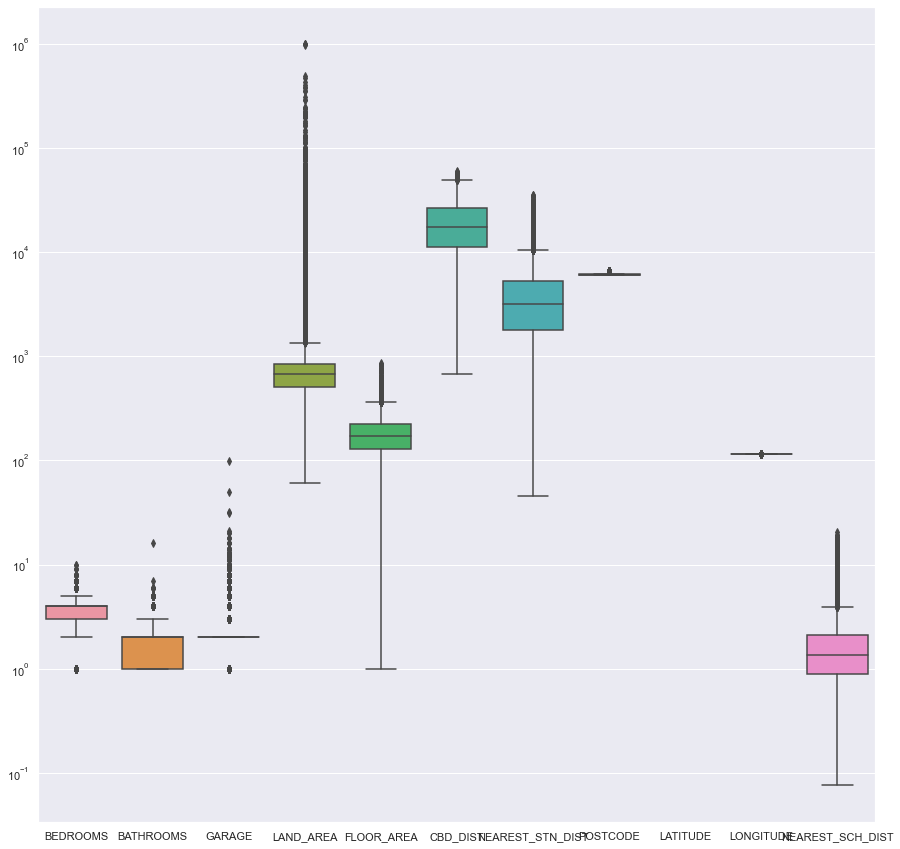

In [32]:
exclude=df_train.drop('PRICE', axis='columns')

plt.figure(figsize=(15,15))
sns.boxplot(data=exclude)
plt.semilogy();

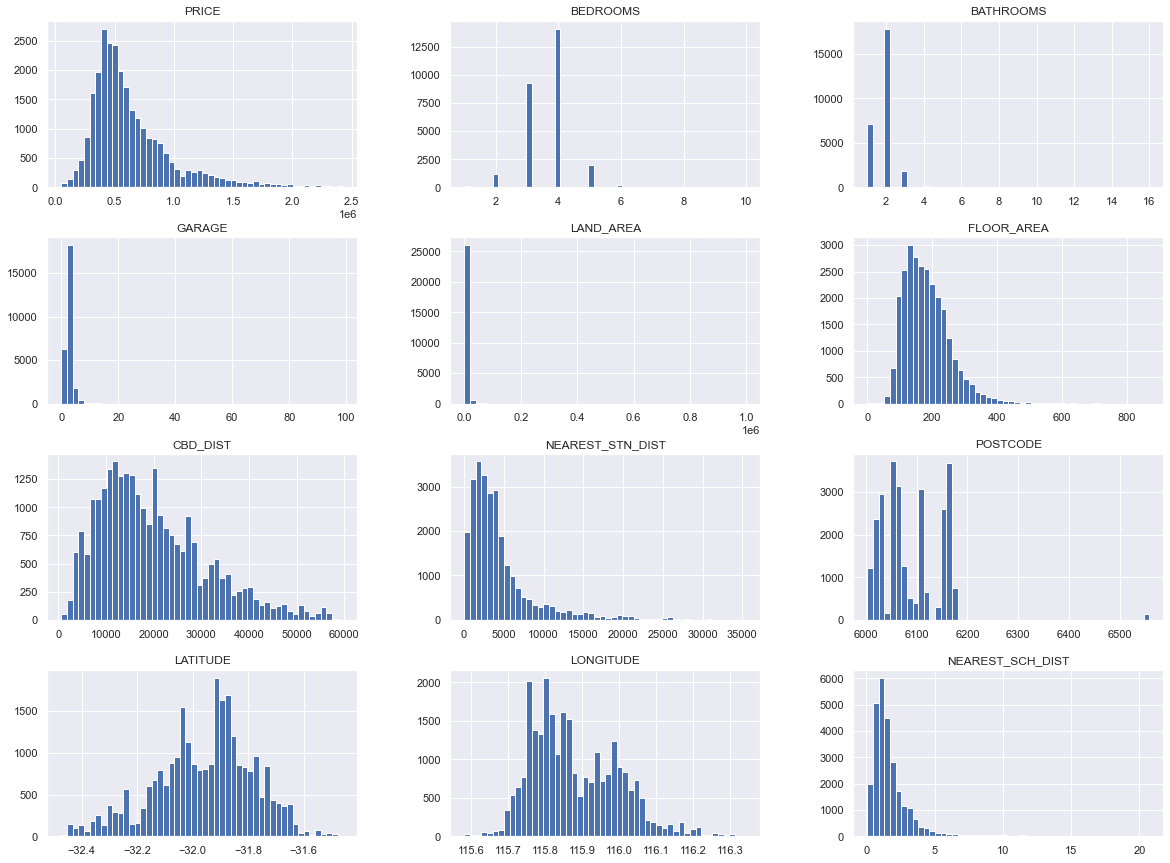

In [33]:
df_train.hist(bins=50, figsize=(20,15));

In [34]:
BBox=df_train.LONGITUDE.min(),df_train.LONGITUDE.max(),df_train.LATITUDE.min(), df_train.LATITUDE.max()

In [35]:
BBox

(115.58273, 116.343201, -32.47297865, -31.45745)

In [36]:
ruh_m = plt.imread( '/Users/d7oomalzharni/Downloads/maps.png')

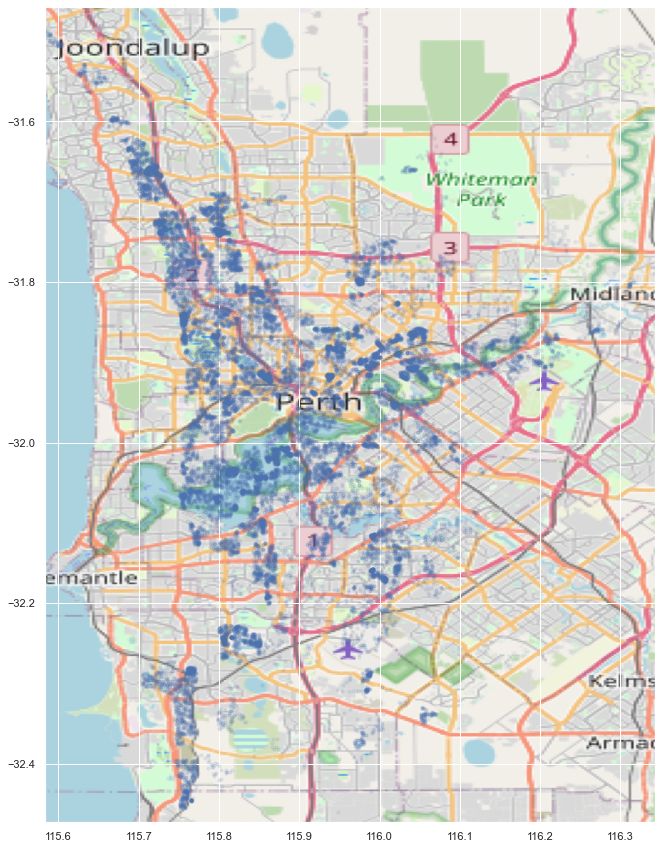

In [37]:
fig, ax = plt.subplots(figsize = (15,15))
ax.scatter(df_train.LONGITUDE, df_train.LATITUDE , zorder=1, alpha= 0.1, c='b', s=10)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

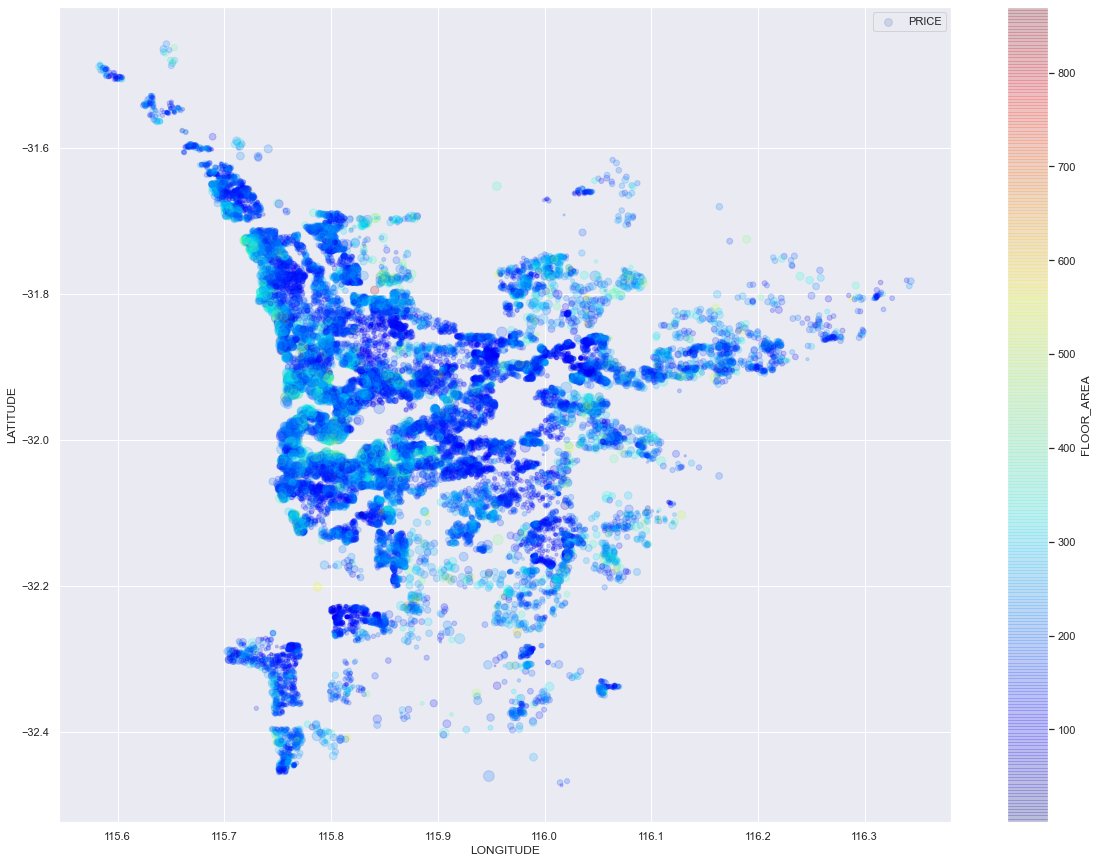

In [38]:
df_train.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.2,
             s=df_train["PRICE"]/20000, label="PRICE", figsize=(20,15),
              c="FLOOR_AREA" , cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend();

In [39]:
df_train.describe()

PRICE      BEDROOMS     BATHROOMS        GARAGE      LAND_AREA  \
count  2.692400e+04  26924.000000  26924.000000  26924.000000   26924.000000   
mean   6.371720e+05      3.660303      1.823986      2.039296    2736.921780   
std    3.545018e+05      0.751162      0.589653      1.465806   17148.259372   
min    5.100000e+04      1.000000      1.000000      0.000000      61.000000   
25%    4.100000e+05      3.000000      1.000000      2.000000     503.000000   
50%    5.380000e+05      4.000000      2.000000      2.000000     682.000000   
75%    7.611250e+05      4.000000      2.000000      2.000000     843.000000   
max    2.430000e+06     10.000000     16.000000     99.000000  999999.000000   

         FLOOR_AREA      CBD_DIST  NEAREST_STN_DIST      POSTCODE  \
count  26924.000000  26924.000000      26924.000000  26924.000000   
mean     183.548618  19765.901538       4523.131741   6089.282907   
std       72.084821  11323.343135       4484.826084     62.488675   
min        1.000000    681.000000         46.000000   6003.000000   
25%      130.000000  11200.000000       1800.000000   6050.000000   
50%      172.000000  17500.000000       3200.000000   6069.000000   
75%      223.000000  26600.000000       5300.000000   6149.000000   
max      870.000000  59800.000000      35500.000000   6558.000000   

           LATITUDE     LONGITUDE  NEAREST_SCH_DIST  
count  26924.000000  26924.000000      26924.000000  
mean     -31.959873    115.879663          1.811140  
std        0.177320      0.118419          1.726090  
min      -32.472979    115.582730          0.075953  
25%      -32.067524    115.790088          0.880582  
50%      -31.931723    115.854317          1.346529  
75%      -31.842970    115.971139          2.105139  
max      -31.457450    116.343201         20.720911

In [40]:
df_train.corr()

PRICE  BEDROOMS  BATHROOMS    GARAGE  LAND_AREA  \
PRICE             1.000000  0.256707   0.375187  0.135236   0.057207   
BEDROOMS          0.256707  1.000000   0.553061  0.195501   0.050060   
BATHROOMS         0.375187  0.553061   1.000000  0.207788   0.028614   
GARAGE            0.135236  0.195501   0.207788  1.000000   0.033198   
LAND_AREA         0.057207  0.050060   0.028614  0.033198   1.000000   
FLOOR_AREA        0.548021  0.540721   0.558270  0.174085   0.071161   
CBD_DIST         -0.354107  0.122529   0.034489  0.026305   0.125569   
NEAREST_STN_DIST -0.095496  0.101552   0.037447  0.071593   0.210325   
POSTCODE         -0.170695  0.014703  -0.035664  0.018874   0.040944   
LATITUDE          0.046464  0.017435   0.046054 -0.014550  -0.020543   
LONGITUDE        -0.183188 -0.011799  -0.090666  0.060634   0.138233   
NEAREST_SCH_DIST -0.020939  0.089359   0.061506  0.064131   0.259831   

                  FLOOR_AREA  CBD_DIST  NEAREST_STN_DIST  POSTCODE  LATITUDE  \
PRICE               0.548021 -0.354107         -0.095496 -0.170695  0.046464   
BEDROOMS            0.540721  0.122529          0.101552  0.014703  0.017435   
BATHROOMS           0.558270  0.034489          0.037447 -0.035664  0.046054   
GARAGE              0.174085  0.026305          0.071593  0.018874 -0.014550   
LAND_AREA           0.071161  0.125569          0.210325  0.040944 -0.020543   
FLOOR_AREA          1.000000  0.023026          0.104657 -0.044494  0.038096   
CBD_DIST            0.023026  1.000000          0.444403  0.258087 -0.192291   
NEAREST_STN_DIST    0.104657  0.444403          1.000000  0.209374  0.045872   
POSTCODE           -0.044494  0.258087          0.209374  1.000000 -0.637826   
LATITUDE            0.038096 -0.192291          0.045872 -0.637826  1.000000   
LONGITUDE          -0.045236 -0.059023          0.498498  0.178442 -0.105889   
NEAREST_SCH_DIST    0.119440  0.372040          0.627517  0.132523  0.009649   

                  LONGITUDE  NEAREST_SCH_DIST  
PRICE             -0.183188         -0.020939  
BEDROOMS          -0.011799          0.089359  
BATHROOMS         -0.090666          0.061506  
GARAGE             0.060634          0.064131  
LAND_AREA          0.138233          0.259831  
FLOOR_AREA        -0.045236          0.119440  
CBD_DIST          -0.059023          0.372040  
NEAREST_STN_DIST   0.498498          0.627517  
POSTCODE           0.178442          0.132523  
LATITUDE          -0.105889          0.009649  
LONGITUDE          1.000000          0.303520  
NEAREST_SCH_DIST   0.303520          1.000000

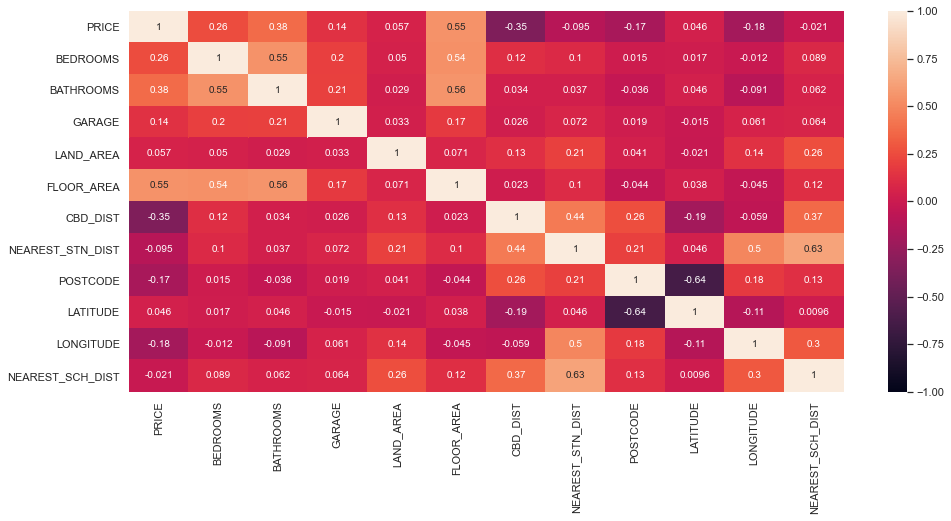

In [41]:
plt.figure(figsize=(16,7))
sns.heatmap(df_train.corr(), annot=True, vmin=-1, vmax=1 );


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


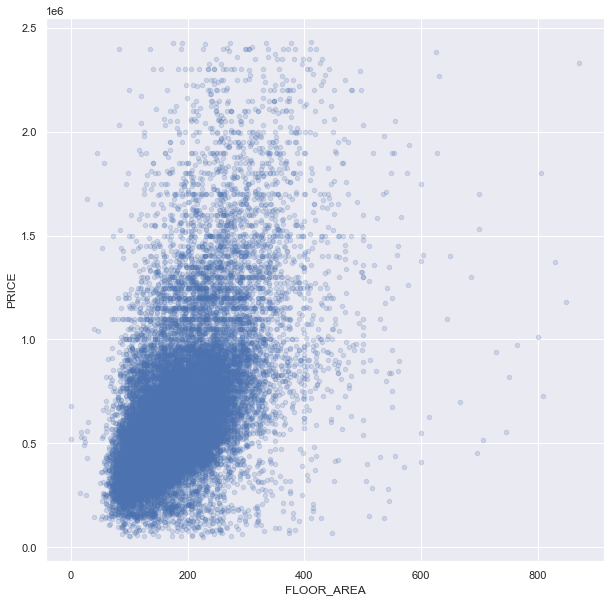

In [42]:
df_train.plot(kind="scatter", x="FLOOR_AREA", y="PRICE",
             alpha=0.2 ,figsize = (10,10) );

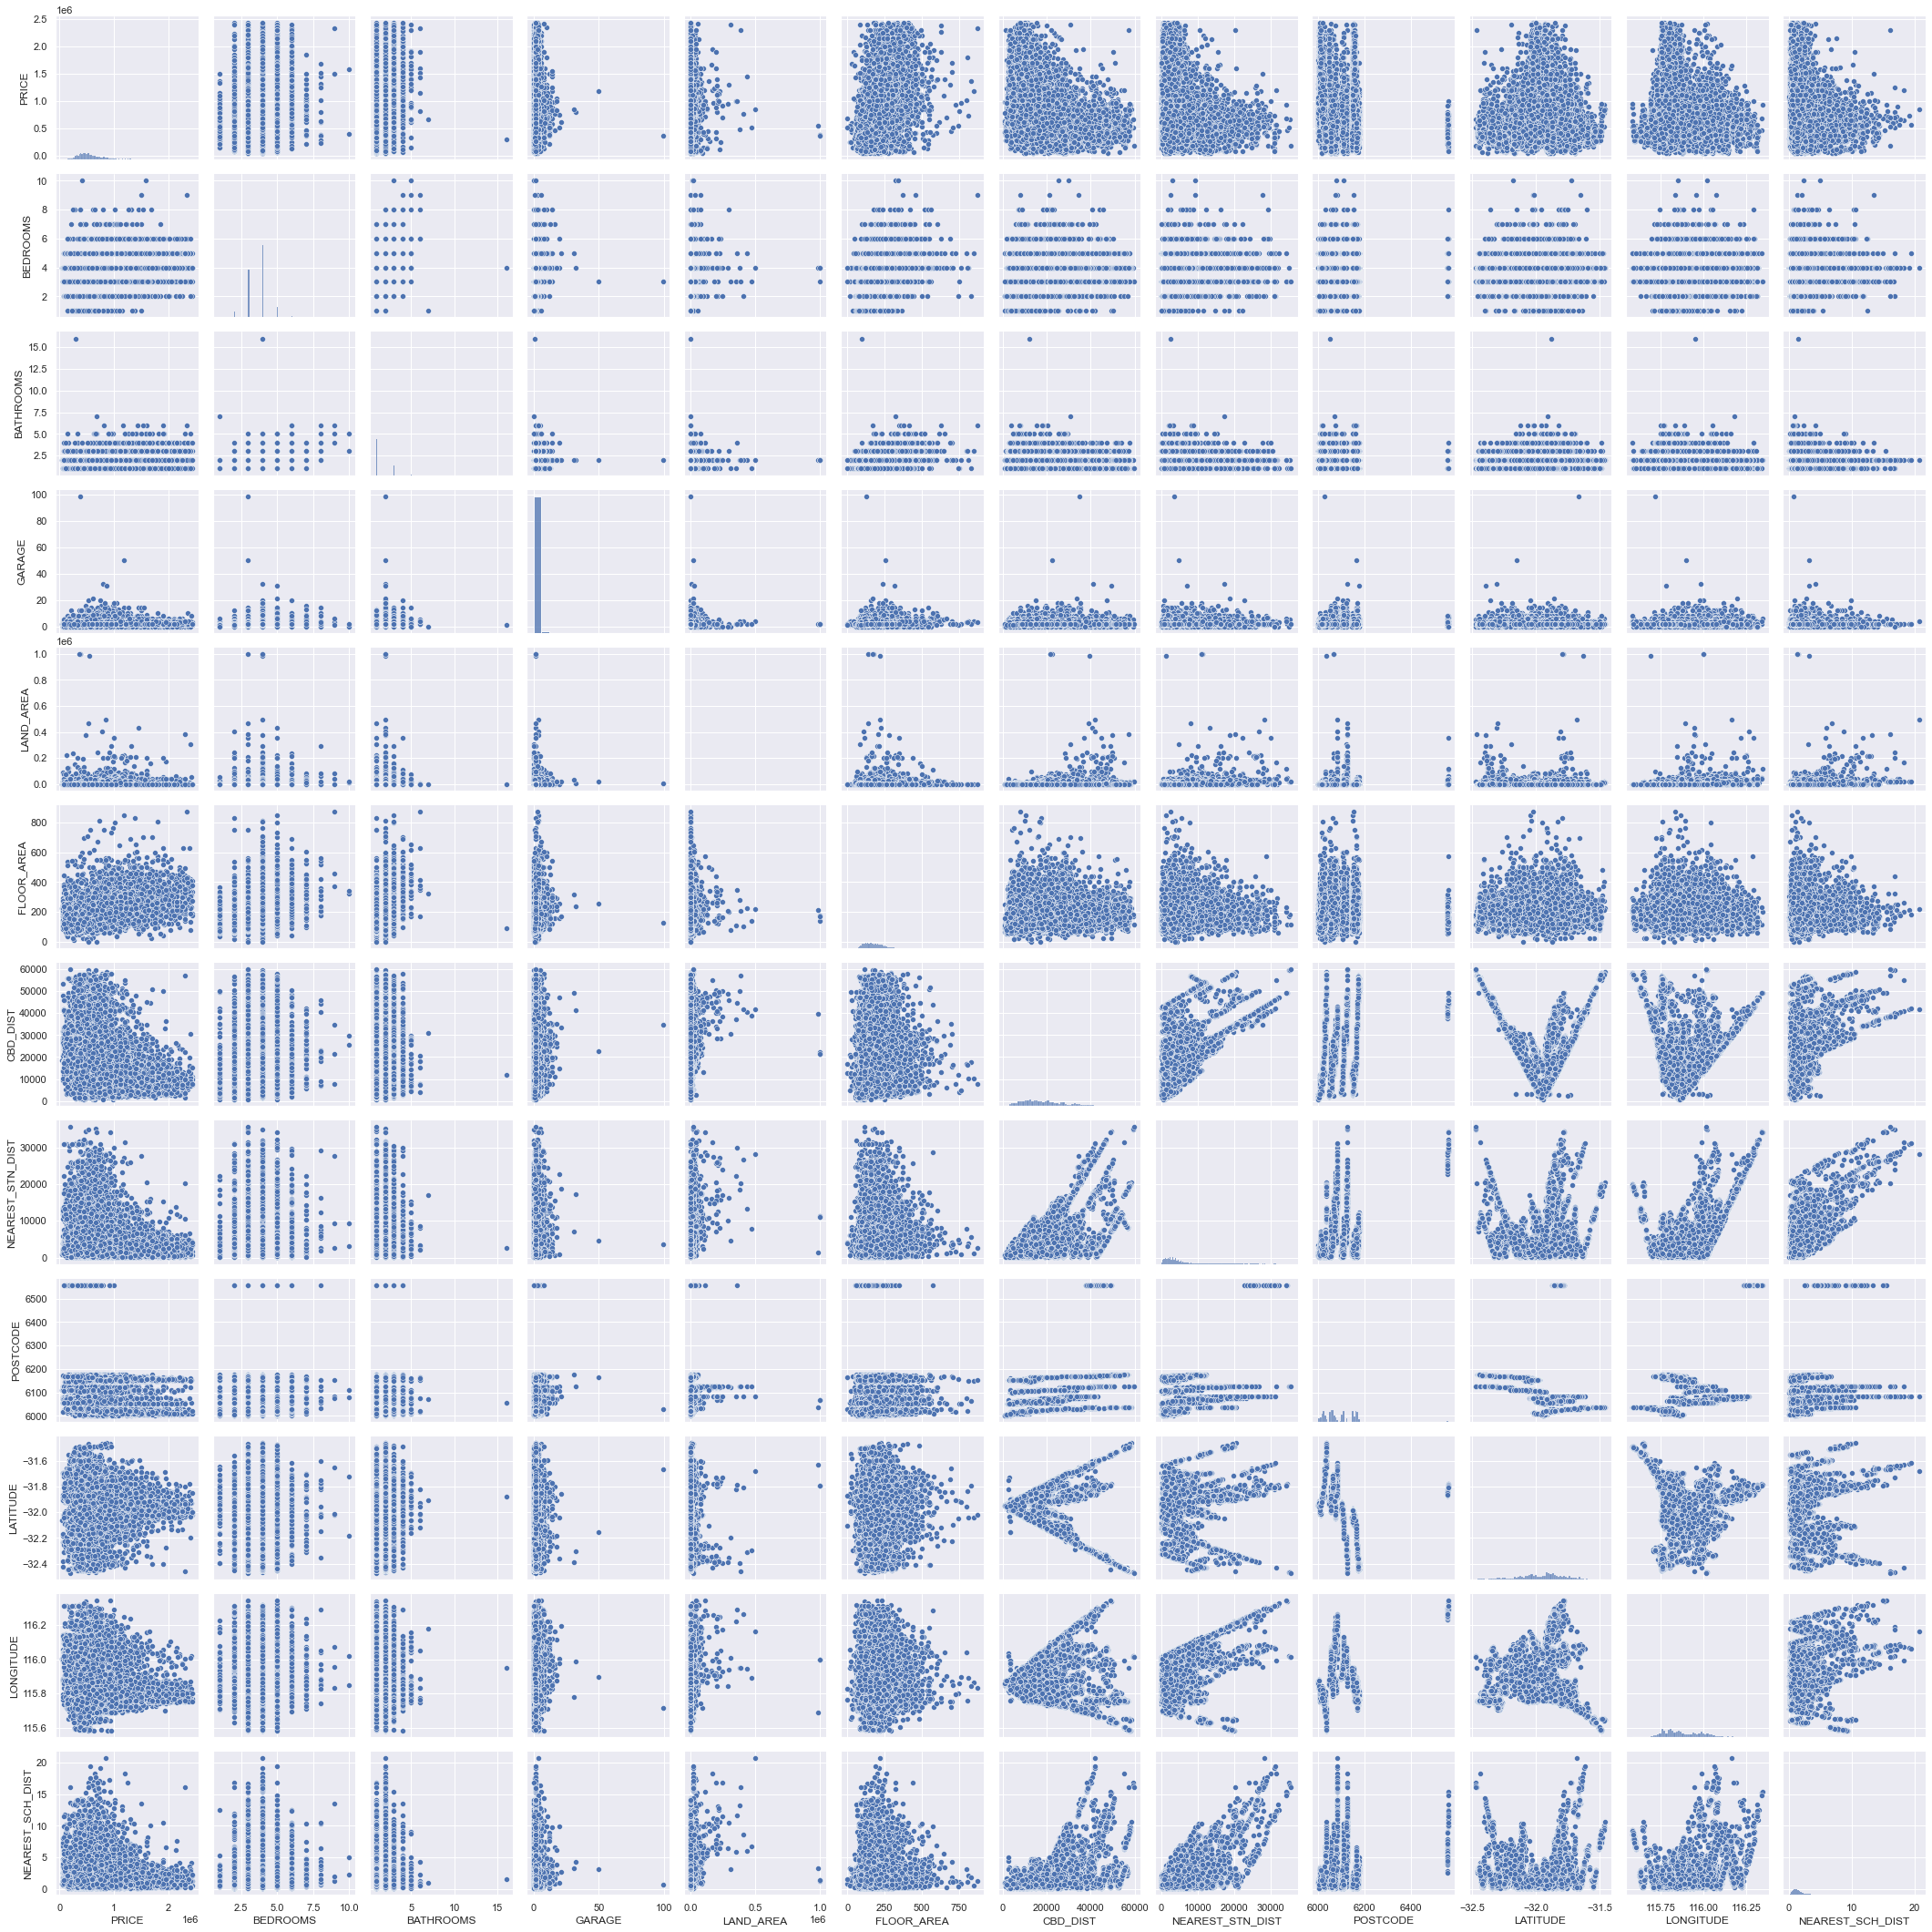

In [43]:
sns.pairplot(df_train)

# Spilt train data (X,Y)
______

In [48]:
x_train=df_train.select_dtypes(exclude=['object']).copy()

In [49]:
x_train

PRICE  BEDROOMS  BATHROOMS  GARAGE  LAND_AREA  FLOOR_AREA  CBD_DIST  \
0      1700000         4          1     2.0       1109         211      8900   
1       720000         4          2     2.0        665         233     20100   
2       583000         4          2     2.0        576         223     15800   
3       619000         2          1     2.0       7669         123     26100   
4       550000         4          2     4.0        781         300     12200   
...        ...       ...        ...     ...        ...         ...       ...   
26919   870000         5          2     2.0        756         263     12400   
26920  1400000         4          2     2.0        455         228     14900   
26921  1025000         4          2     2.0        787         199      8900   
26922   941000         4          2     2.0       2006         264     20800   
26923   599000         4          2     2.0        576         212     19800   

       NEAREST_STN_DIST  POSTCODE   LATITUDE   LONGITUDE  NEAREST_SCH_DIST  
0                  5100      6015 -31.936660  115.765800          2.526523  
1                  2400      6065 -31.778005  115.803129          1.264338  
2                  8800      6065 -31.810774  115.875489          0.902272  
3                 12300      6072 -31.905560  116.129660          3.615144  
4                  8200      6066 -31.844680  115.883220          0.965173  
...                 ...       ...        ...         ...               ...  
26919              1000      6020 -31.853917  115.797164          2.016516  
26920              3600      6020 -31.849104  115.758364          1.707696  
26921              4800      6019 -31.919610  115.772470          1.340849  
26922              7400      6070 -31.914850  116.074230          0.575310  
26923               775      6164 -32.129590  115.864700          1.598870  

[26924 rows x 12 columns]

In [50]:
x_train.shape

(26924, 12)

In [51]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26924 entries, 0 to 26923
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PRICE             26924 non-null  int64  
 1   BEDROOMS          26924 non-null  int64  
 2   BATHROOMS         26924 non-null  int64  
 3   GARAGE            26924 non-null  float64
 4   LAND_AREA         26924 non-null  int64  
 5   FLOOR_AREA        26924 non-null  int64  
 6   CBD_DIST          26924 non-null  int64  
 7   NEAREST_STN_DIST  26924 non-null  int64  
 8   POSTCODE          26924 non-null  int64  
 9   LATITUDE          26924 non-null  float64
 10  LONGITUDE         26924 non-null  float64
 11  NEAREST_SCH_DIST  26924 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 2.5 MB


In [52]:
x_train1, y_train1 = x_train.drop('PRICE',axis=1),x_train['PRICE']

In [53]:
x_train1.shape

(26924, 11)

In [54]:
y_train1.shape

(26924,)

# Linear Regression model 
______

In [55]:
mod1=LinearRegression()

In [56]:
mod1.fit(x_train1, y_train1)

LinearRegression()

In [57]:
mod1.score(x_train1, y_train1)

0.5323559957835021

In [58]:
list(zip(x_train1,mod1.coef_))


[('BEDROOMS', -10137.686526993644),
 ('BATHROOMS', 60007.3012692352),
 ('GARAGE', 11942.584581189249),
 ('LAND_AREA', 1.3899906964725233),
 ('FLOOR_AREA', 2242.687350010173),
 ('CBD_DIST', -16.54730202024075),
 ('NEAREST_STN_DIST', 18.544321619396214),
 ('POSTCODE', -866.594025528371),
 ('LATITUDE', -437262.65310744767),
 ('LONGITUDE', -994014.1854107182),
 ('NEAREST_SCH_DIST', 14847.480302018173)]

In [59]:
print(mod1.intercept_)

106829435.54703571


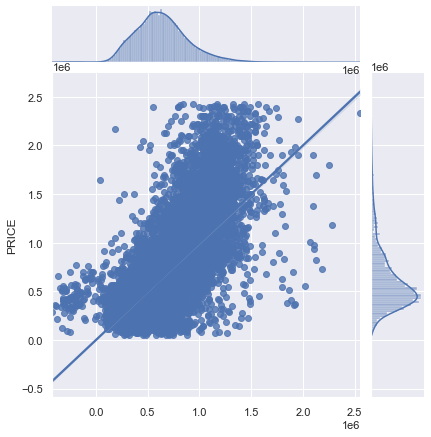

In [60]:
preds = mod1.predict(x_train1) 
sns.jointplot(x=preds,y=y_train1, kind='reg')

## Cross Valdation 
____

In [61]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()

cross_val_score(lm,x_train1, y_train1, cv=5, scoring='r2')

array([0.52327666, 0.51205556, 0.5396566 , 0.53025075, 0.55044687])

In [62]:
print(np.mean(cross_val_score(lm, x_train1, y_train1, cv=5, scoring='r2')))

0.5311372869217231


# Polynomial Features
_____

In [64]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
degree = 2
lm_poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
lm_poly.fit(x_train1, y_train1)
lm_poly.score(x_train1, y_train1)


0.7029675286383011

In [65]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
cross_val_score(lm_poly,x_train1 , y_train1, cv=5,scoring='r2')

array([0.66459395, 0.63554266, 0.69847023, 0.68036261, 0.69843822])

In [66]:
print(np.mean(cross_val_score(lm_poly, x_train1, y_train1, cv=5, scoring='r2')))

0.6754815348318246


# Evaluating Regression Models
 _______________

In [67]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
preds = mod1.predict(x_train1)
rmse = mean_squared_error(y_train1, preds, squared=False)
mae = mean_absolute_error(y_train1, preds)
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(rmse, 2))


Mean Absolute Error: 168107.39
Mean Squared Error: 242419.82


In [68]:
preds1 = lm_poly.predict(x_train1)
rmse = mean_squared_error(y_train1, preds1, squared=False)
mae = mean_absolute_error(y_train1, preds1)
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(rmse, 2))

Mean Absolute Error: 128471.3
Mean Squared Error: 193202.35


In [69]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

model = sm.OLS(y_train1, sm.add_constant(x_train1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     2785.
Date:                Sun, 05 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:33:06   Log-Likelihood:            -3.7202e+05
No. Observations:               26924   AIC:                         7.441e+05
Df Residuals:                   26912   BIC:                         7.442e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.068e+08   1.83e+06     58.352      0.000    1.03e+08     1.1e+08
BEDROOMS         -1.014e+04   2543.368     -3.986      0.000   -1.51e+04   -5152.552
BATHROOMS         6.001e+04   3272.127     18.339      0.000    5.36e+04    6.64e+04
GARAGE            1.194e+04   1040.187     11.481      0.000    9903.765     1.4e+04
LAND_AREA            1.3900      0.090     15.498      0.000       1.214       1.566
FLOOR_AREA        2242.6874     26.656     84.133      0.000    2190.439    2294.935
CBD_DIST           -16.5473      0.168    -98.250      0.000     -16.877     -16.217
NEAREST_STN_DIST    18.5443      0.542     34.244      0.000      17.483      19.606
POSTCODE          -866.5940     32.429    -26.723      0.000    -930.156    -803.032
LATITUDE         -4.373e+05   1.15e+04    -37.909      0.000    -4.6e+05   -4.15e+05
LONGITUDE         -9.94e+05   1.62e+04    -61.204      0.000   -1.03e+06   -9.62e+05
NEAREST_SCH_DIST  1.485e+04   1129.112     13.150      0.000    1.26e+04    1.71e+04
==============================================================================
Omnibus:                     7092.056   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38069.876
Skew:                           1.166   Prob(JB):                         0.00
Kurtosis:                       8.339   Cond. No.                     3.03e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Test 20%

In [70]:
df_test

ADDRESS         SUBURB   PRICE  BEDROOMS  BATHROOMS  GARAGE  \
22007  41 Partridge Bend         Byford  430000         4          2     2.0   
8102        17 Ivory Way       Mindarie  830000         4          2     2.0   
8240   17 Opperman Place    Middle Swan  310000         3          1     1.0   
31141       8 Milos Loop      Spearwood  690000         4          2     2.0   
7878       17 Benton Way        Warwick  521500         3          1     NaN   
...                  ...            ...     ...       ...        ...     ...   
12482   22 Marian Street        Innaloo  552000         3          1     2.0   
17164  3 Welcome Meander     Harrisdale  587000         4          2     4.0   
22433  43 Farmview Drive       Bellevue  385000         4          1     1.0   
30156    75 Lesueur Pass        Beeliar  500000         4          2     2.0   
20912      4 Henty Grove  Helena Valley  495000         3          2     2.0   

       LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST               NEAREST_STN  \
22007        599         237      2014.0     33200          Armadale Station   
8102         625         393      2007.0     32800          Clarkson Station   
8240         576          92      1990.0     18100           Midland Station   
31141        680         239      2002.0     19400  Cockburn Central Station   
7878         751         165      1972.0     13800           Warwick Station   
...          ...         ...         ...       ...                       ...   
12482        436         112      1958.0      9100          Stirling Station   
17164        696         200      2009.0     20000  Cockburn Central Station   
22433        680         112      1986.0     17400           Midland Station   
30156        527         157      1996.0     20400  Cockburn Central Station   
20912        278         124      2015.0     16900           Midland Station   

       NEAREST_STN_DIST  DATE_SOLD  POSTCODE   LATITUDE   LONGITUDE  \
22007              8500  08-2019\r      6122 -32.228102  115.992337   
8102               3000  07-2019\r      6030 -31.687390  115.706570   
8240               3200  08-2017\r      6056 -31.871110  116.025110   
31141              7400  06-2018\r      6163 -32.113500  115.781510   
7878               1700  04-2018\r      6024 -31.835350  115.811020   
...                 ...        ...       ...        ...         ...   
12482              1300  07-2019\r      6018 -31.894985  115.790690   
17164              6600  03-2019\r      6112 -32.121679  115.928389   
22433              3800  07-2012\r      6056 -31.908885  116.035968   
30156              3400  12-2017\r      6164 -32.132590  115.823550   
20912              4500  11-2016\r      6056 -31.920837  116.033771   

                                     NEAREST_SCH  NEAREST_SCH_DIST  \
22007                   BYFORD SECONDARY COLLEGE          1.037310   
8102                     MINDARIE SENIOR COLLEGE          1.159039   
8240                      SWAN CHRISTIAN COLLEGE          1.902675   
31141                                PORT SCHOOL          3.405557   
7878                  WARWICK SENIOR HIGH SCHOOL          0.557137   
...                                          ...               ...   
12482  INTERNATIONAL SCHOOL OF WESTERN AUSTRALIA          1.294721   
17164                      CAREY BAPTIST COLLEGE          1.308878   
22433               SWAN VIEW SENIOR HIGH SCHOOL          2.508543   
30156                       DIVINE MERCY COLLEGE          0.892260   
20912                 TREETOPS MONTESSORI SCHOOL          3.820676   

       NEAREST_SCH_RANK  
22007             116.0  
8102              111.0  
8240               93.0  
31141               NaN  
7878                NaN  
...                 ...  
12482               NaN  
17164              62.0  
22433               NaN  
30156               NaN  
20912               NaN  

[6732 rows x 19 columns]

In [71]:
df_test.shape

(6732, 19)

In [72]:
df_test=df_test.reset_index()

In [73]:
df_test.head(3)

index            ADDRESS       SUBURB   PRICE  BEDROOMS  BATHROOMS  GARAGE  \
0  22007  41 Partridge Bend       Byford  430000         4          2     2.0   
1   8102       17 Ivory Way     Mindarie  830000         4          2     2.0   
2   8240  17 Opperman Place  Middle Swan  310000         3          1     1.0   

   LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST       NEAREST_STN  \
0        599         237      2014.0     33200  Armadale Station   
1        625         393      2007.0     32800  Clarkson Station   
2        576          92      1990.0     18100   Midland Station   

   NEAREST_STN_DIST  DATE_SOLD  POSTCODE   LATITUDE   LONGITUDE  \
0              8500  08-2019\r      6122 -32.228102  115.992337   
1              3000  07-2019\r      6030 -31.687390  115.706570   
2              3200  08-2017\r      6056 -31.871110  116.025110   

                NEAREST_SCH  NEAREST_SCH_DIST  NEAREST_SCH_RANK  
0  BYFORD SECONDARY COLLEGE          1.037310             116.0  
1   MINDARIE SENIOR COLLEGE          1.159039             111.0  
2    SWAN CHRISTIAN COLLEGE          1.902675              93.0

In [74]:
df_test=df_test.drop(['index'], axis=1)

In [75]:
df_test.head()

ADDRESS       SUBURB   PRICE  BEDROOMS  BATHROOMS  GARAGE  \
0  41 Partridge Bend       Byford  430000         4          2     2.0   
1       17 Ivory Way     Mindarie  830000         4          2     2.0   
2  17 Opperman Place  Middle Swan  310000         3          1     1.0   
3       8 Milos Loop    Spearwood  690000         4          2     2.0   
4      17 Benton Way      Warwick  521500         3          1     NaN   

   LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST               NEAREST_STN  \
0        599         237      2014.0     33200          Armadale Station   
1        625         393      2007.0     32800          Clarkson Station   
2        576          92      1990.0     18100           Midland Station   
3        680         239      2002.0     19400  Cockburn Central Station   
4        751         165      1972.0     13800           Warwick Station   

   NEAREST_STN_DIST  DATE_SOLD  POSTCODE   LATITUDE   LONGITUDE  \
0              8500  08-2019\r      6122 -32.228102  115.992337   
1              3000  07-2019\r      6030 -31.687390  115.706570   
2              3200  08-2017\r      6056 -31.871110  116.025110   
3              7400  06-2018\r      6163 -32.113500  115.781510   
4              1700  04-2018\r      6024 -31.835350  115.811020   

                  NEAREST_SCH  NEAREST_SCH_DIST  NEAREST_SCH_RANK  
0    BYFORD SECONDARY COLLEGE          1.037310             116.0  
1     MINDARIE SENIOR COLLEGE          1.159039             111.0  
2      SWAN CHRISTIAN COLLEGE          1.902675              93.0  
3                 PORT SCHOOL          3.405557               NaN  
4  WARWICK SENIOR HIGH SCHOOL          0.557137               NaN

In [76]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6732 entries, 0 to 6731
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           6732 non-null   object 
 1   SUBURB            6732 non-null   object 
 2   PRICE             6732 non-null   int64  
 3   BEDROOMS          6732 non-null   int64  
 4   BATHROOMS         6732 non-null   int64  
 5   GARAGE            6247 non-null   float64
 6   LAND_AREA         6732 non-null   int64  
 7   FLOOR_AREA        6732 non-null   int64  
 8   BUILD_YEAR        6080 non-null   float64
 9   CBD_DIST          6732 non-null   int64  
 10  NEAREST_STN       6732 non-null   object 
 11  NEAREST_STN_DIST  6732 non-null   int64  
 12  DATE_SOLD         6732 non-null   object 
 13  POSTCODE          6732 non-null   int64  
 14  LATITUDE          6732 non-null   float64
 15  LONGITUDE         6732 non-null   float64
 16  NEAREST_SCH       6732 non-null   object 


# Handel the datatest
________________

In [77]:
df_test.isnull().sum()

ADDRESS                0
SUBURB                 0
PRICE                  0
BEDROOMS               0
BATHROOMS              0
GARAGE               485
LAND_AREA              0
FLOOR_AREA             0
BUILD_YEAR           652
CBD_DIST               0
NEAREST_STN            0
NEAREST_STN_DIST       0
DATE_SOLD              0
POSTCODE               0
LATITUDE               0
LONGITUDE              0
NEAREST_SCH            0
NEAREST_SCH_DIST       0
NEAREST_SCH_RANK    2224
dtype: int64

In [78]:
df_test['GARAGE'] = df_test['GARAGE'].replace('NA',0)

In [79]:
df_test['GARAGE'] = df_test['GARAGE'].replace('inf',0)

In [80]:
df_test['GARAGE'] = df_test['GARAGE'].astype(float)

In [81]:
df_test['GARAGE'] = df_test['GARAGE'].fillna(0)

In [82]:
df_test=df_test.drop(['BUILD_YEAR'], axis=1)

In [83]:
df_test=df_test.drop(['NEAREST_SCH_RANK'], axis=1)

In [84]:
df_test.isnull().sum()

ADDRESS             0
SUBURB              0
PRICE               0
BEDROOMS            0
BATHROOMS           0
GARAGE              0
LAND_AREA           0
FLOOR_AREA          0
CBD_DIST            0
NEAREST_STN         0
NEAREST_STN_DIST    0
DATE_SOLD           0
POSTCODE            0
LATITUDE            0
LONGITUDE           0
NEAREST_SCH         0
NEAREST_SCH_DIST    0
dtype: int64

In [85]:
df_test.duplicated().sum()

0

In [86]:
df_test.shape

(6732, 17)

# Spilt test data (X,Y)
______

In [87]:
x_test1=df_test.select_dtypes(exclude=['object']).copy()

In [88]:
x_test,y_test =x_test1.drop('PRICE',axis=1),x_test1['PRICE']

In [89]:
x_test.shape

(6732, 11)

In [90]:
y_test.shape

(6732,)

In [91]:
mod1=LinearRegression()

In [92]:
mod1.fit(x_train1, y_train1)

LinearRegression()

In [93]:
mod1.score(x_test,y_test)

0.5324966538768126

In [94]:
y_pred=mod1.predict(x_test)
y_pred

array([577619.90069866, 961298.03083624, 223533.33733867, ...,
       295823.5430871 , 602796.83119291, 452410.86055218])

In [95]:
rmse = mean_squared_error(y_test, y_pred,squared=False)
rmse

246879.4698838572

In [96]:
expected = y_test

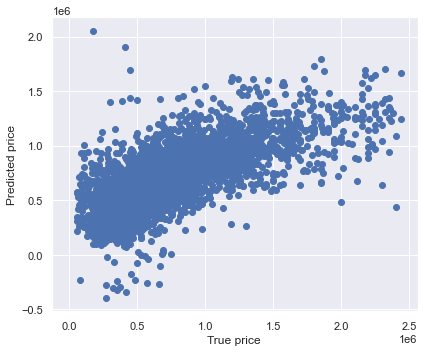

In [97]:
mod1=LinearRegression()
mod1.fit(x_train1, y_train1)
y_pred=mod1.predict(x_test)
expected  = y_test

plt.figure(figsize=(6, 5))
plt.scatter(expected ,y_pred)
plt.plot([0, 50], [0, 50],'--k' )
plt.xlabel('True price ')
plt.ylabel('Predicted price')
plt.tight_layout()

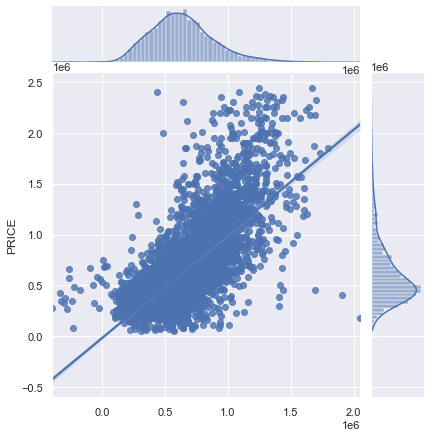

In [98]:
y_pred=mod1.predict(x_test)
sns.jointplot(x=y_pred,y=y_test, kind='reg')

In [99]:
degree = 2
lm_poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
lm_poly.fit(x_train1, y_train1)
print(lm_poly.score(x_train1, y_train1))
print(lm_poly.score(x_test,y_test))
y_predp=lm_poly.predict(x_test)
print(y_predp)

0.7029675286383011
0.6828503123684954
[511559.16827774 856885.6445961  314188.39657974 ... 355322.17017365
 501782.97297668 403138.33056641]


In [100]:
rmse = mean_squared_error(y_test, y_predp,squared=False)
rmse

203340.90791271388

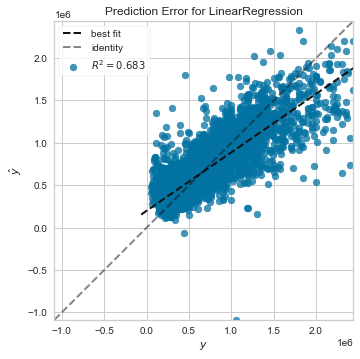

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [101]:
from yellowbrick.regressor import prediction_error
visualizer = prediction_error(lm_poly, x_train1, y_train1, x_test, y_test)
visualizer.show()

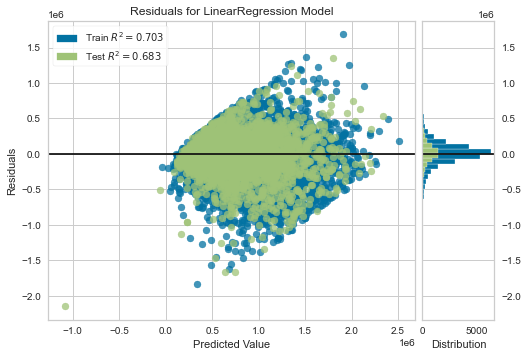

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [102]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(make_pipeline(PolynomialFeatures(degree), LinearRegression()))
visualizer.fit(x_train1, y_train1)
visualizer.score( x_test, y_test)
visualizer.show()

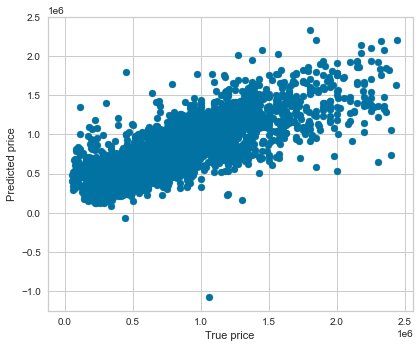

In [103]:
mod1=LinearRegression()
mod1.fit(x_train1, y_train1)
y_pred=mod1.predict(x_test)
expected  = y_test

plt.figure(figsize=(6, 5))
plt.scatter(expected ,y_predp)
plt.plot([0, 50], [0, 50],'--k' )
plt.xlabel('True price ')
plt.ylabel('Predicted price')
plt.tight_layout()

_______________________________________

In [ ]:
# make copy of x-train and select some columes 


In [ ]:
train_x=x_train.loc[:,['BEDROOMS','BATHROOMS','GARAGE','LAND_AREA','FLOOR_AREA','CBD_DIST','POSTCODE']].copy()

In [ ]:
train_x

In [ ]:
mod3=LinearRegression()

In [ ]:
mod3.fit(train_x, y_train1)

In [ ]:
mod3.score(train_x, y_train1)

In [ ]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
cross_val_score(lm, train_x, y_train1, cv=5,scoring='r2')

In [ ]:
pip install yellowbrick

In [ ]:
from yellowbrick.regressor import prediction_error
visualizer = prediction_error(est, X_train, y_train, X_test, y_test)
visualizer.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [ ]:

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(train_x.values)
#X_val_poly = poly.transform(x_val.values)
#X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()
lm_poly.fit(X_train_poly,y_train1)
lm_poly.score(X_train_poly,y_train1)

In [ ]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
cross_val_score(lm,X_train_poly , y_train1, cv=5,scoring='r2')

_____________________

In [ ]:
# I take a copy from the df-train to change an object(Address) to Dummy.  

In [ ]:
df_train
b_train=df_train.select_dtypes(exclude=['object']).copy()
b_train['ADDRESS'] = df_train['ADDRESS']
b_train.head(3)

In [ ]:
df_train['ADDRESS'].unique()

In [ ]:

pd.get_dummies(b_train['ADDRESS'], drop_first=True).head(5)

In [ ]:
b_train = pd.get_dummies(b_train, drop_first=True) #can just apply it to the whole df
b_train.head(3)

In [ ]:
X, y = b_train.drop('PRICE',axis=1), b_train['PRICE']

In [ ]:
X.head()

In [ ]:
X.shape 

In [ ]:
y.shape 

In [ ]:
mod4=LinearRegression()

In [ ]:
#mod4.fit(X, y)

In [ ]:
mod4.score(X, y)